In [1]:
# ref
# HF = -1727.543941840376
# E(UCCSD) = -1729.416695163759  E_corr = -1.87275332338343
# UCCSD(T) correction = -0.0383567424684588
# AFQMC_PT2 = -1729.457902 +/- 0.000476   time = 47679.73s
hs_mf = -1727.543941840376
hs_ref_ccsd = -1.87275332338343
# ref_ccsd_t = ref_ccsd + -0.0383567424684588
hs_ref_afqmc_pt2 = -1729.457902 - hs_mf
hs_ref_afqmc_pt2_err = 0.000476
# print(ref_ccsd_t)
# print(hs_ref_afqmc_pt2)
data = '''
#   thresh      MP2            CCSD          CCSD(T)           AFQMC/CCSD_PT2             mp2_cr             LAS-SIZE               time
    1e-4    -1.41905277     -1.52186252     -1.52994277     -1.534329 +/- 0.000193      -0.41867154     (3.6,3.3)/(15.0,13.8)       5755.19 
    1e-5    -1.75774630     -1.79815238     -1.81891526     -1.828065 +/- 0.000342      -0.07997887     (5.8,5.0)/(31.9,28.9)       3930.09
    1e-6    -1.82366064     -1.86073223          -          -1.898188 +/- 0.000377      -0.01406452     (14.6,12.7)/(73.3,68.6)     10835.35
    3e-7    -1.83404757     -1.86972986          -          -1.909662 +/- 0.000408      -0.00367760     (22.2,20.2)/(102.5,96.7)    29808.06 
#   ref     -1.83772516     -1.87275332     -1.91111006     -1.913960 +/- 0.000476            -         (33,29)/(246, 246)          47679.73
'''
import numpy as np
thresh = []
hs_mp2 = []
hs_ccsd = []
# hs_ccsd_t = []
hs_afqmc_pt2 = []
hs_afqmc_pt2_err = []
hs_mp2cr = []
for line in data.splitlines():
    if not line.startswith('#') and len(line)>0:
        parts = line.split()
        thresh = np.hstack((thresh,[float(parts[0])]))
        hs_mp2 = np.hstack((hs_mp2,[float(parts[1])]))
        hs_ccsd = np.hstack((hs_ccsd,[float(parts[2])]))
        # ccsd_t = np.hstack((ccsd_t,[float(parts[2])]))
        hs_afqmc_pt2 = np.hstack((hs_afqmc_pt2,[float(parts[4])]))
        hs_afqmc_pt2_err = np.hstack((hs_afqmc_pt2_err,[float(parts[6])]))
        hs_mp2cr = np.hstack((hs_mp2cr,[float(parts[7])]))

# ccsd_t = ccsd_t + ccsd

hs_ref_ccsd = np.array([hs_ref_ccsd]*len(hs_ccsd))
# ref_ccsd_t = [ref_ccsd_t]*len(ccsd_t)
hs_ref_afqmc_pt2 = np.array([hs_ref_afqmc_pt2]*len(hs_afqmc_pt2))

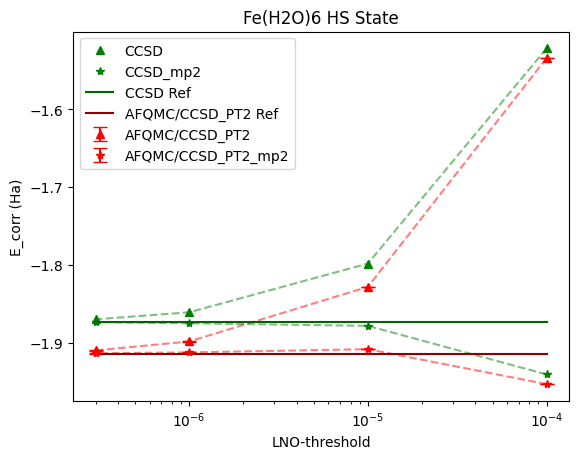

In [2]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(10, 6))
plt.plot(thresh,hs_ccsd,'^',color='green',label='CCSD')
plt.plot(thresh,hs_ccsd,'--',color='green',alpha=0.5)
plt.plot(thresh,hs_ccsd+hs_mp2cr,'*',color='green',label='CCSD_mp2')
plt.plot(thresh,hs_ccsd+hs_mp2cr,'--',color='green',alpha=0.5)
# plt.plot(thresh,ccsd_t,'^',color='blue',label='CCSD(T)')
# plt.plot(thresh,ccsd_t,'--',color='blue',alpha=0.5)
# plt.plot(thresh,ccsd_t+mp2cr,'*',color='blue',label='CCSD(T)_mp2')
# plt.plot(thresh,ccsd_t+mp2cr,'--',color='blue',alpha=0.5)
plt.errorbar(thresh,hs_afqmc_pt2,hs_afqmc_pt2_err,fmt='^',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.plot(thresh,hs_afqmc_pt2,'--',color='red',alpha = 0.5)
plt.errorbar(thresh,hs_afqmc_pt2+hs_mp2cr,hs_afqmc_pt2_err,fmt='*',capsize=5, color='red', label='AFQMC/CCSD_PT2_mp2')
plt.plot(thresh,hs_afqmc_pt2+hs_mp2cr,'--',color='red',alpha = 0.5)
plt.plot(thresh,hs_ref_ccsd,'-',color='darkgreen',label='CCSD Ref')
# plt.plot(thresh,ref_ccsd_t,'-',color='darkblue',label='CCSD(T) Ref')
plt.plot(thresh,hs_ref_afqmc_pt2,'-', color='darkred', label='AFQMC/CCSD_PT2 Ref')
plt.xscale('log')
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('Fe(H2O)6 HS State')
plt.legend()
plt.show()

In [3]:
# LS
# HF = -1727.428454428201
# E(UCCSD) = -1729.346931192244  E_corr = -1.91847676404267
# AFQMC/UCCSD_PT2 energy (direct obs): -1729.396266 +/- 0.000460
# total run time: 64546.81
ls_mf =  -1727.428454428201
ls_ref_ccsd = -1.918476764042671
ls_ref_afqmc_pt2 = -1729.396266 - -1727.428454428201
ls_ref_afqmc_pt2_err =  0.000460
# print(ref_ccsd_t_ls)
# print(ls_ref_afqmc_pt2)
data = '''
#   thresh      MP2             CCSD          CCSD(T)           AFQMC/CCSD_PT2             mp2_cr             LAS-SIZE             time
    1e-4    -1.44949863     -1.55688983          -          -1.569075 +/- 0.000226      -0.42187899     (3.5,3.5)/(15.0,15.2)     2530.87
    1e-5    -1.78114059     -1.83244234          -          -1.866422 +/- 0.000437      -0.09023664     (5.8,5.9)/(33.8,33.6)     3732.57
    1e-6    -1.85756249     -1.90526029          -          -1.950492 +/- 0.000547      -0.01381460     (16.3,16.2)/(79.9,80.0)   13033.93
    3e-7    -1.86742325     -1.91423132          -          -1.961971 +/- 0.000591      -0.00395339     (22.9,22.9)/(107.9,107.9) 40830.46
#   ref     -1.87137723     -1.91111006          -          -1.967811 +/- 0.000460            -                                   64546.81
'''
import numpy as np
thresh = []
ls_mp2 = []
ls_ccsd = []
# ccsd_t = []
ls_afqmc_pt2 = []
ls_afqmc_pt2_err = []
ls_mp2cr = []
for line in data.splitlines():
    if not line.startswith('#') and len(line)>0:
        parts = line.split()
        thresh = np.hstack((thresh,[float(parts[0])]))
        ls_mp2 = np.hstack((ls_mp2,[float(parts[1])]))
        ls_ccsd = np.hstack((ls_ccsd,[float(parts[2])]))
        # ccsd_t = np.hstack((ccsd_t,[float(parts[2])]))
        ls_afqmc_pt2 = np.hstack((ls_afqmc_pt2,[float(parts[4])]))
        ls_afqmc_pt2_err = np.hstack((ls_afqmc_pt2_err,[float(parts[6])]))
        ls_mp2cr = np.hstack((ls_mp2cr,[float(parts[7])]))

# ccsd_t = ccsd_t + ccsd

ls_ref_ccsd = np.array([ls_ref_ccsd]*len(ls_ccsd))
# ref_ccsd_t = [ref_ccsd_t]*len(ccsd_t)
ls_ref_afqmc_pt2 = np.array([ls_ref_afqmc_pt2]*len(ls_afqmc_pt2))

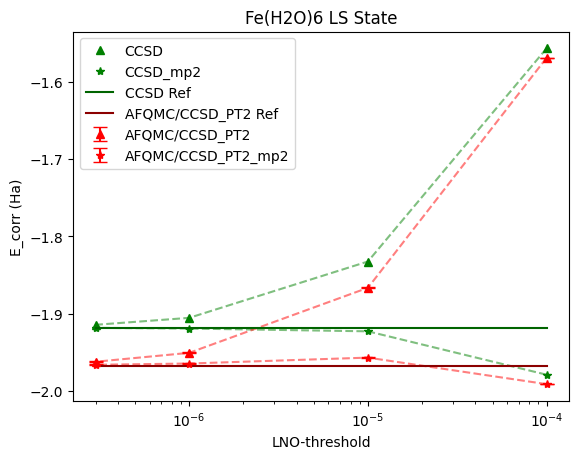

In [4]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(10, 6))
plt.plot(thresh,ls_ccsd,'^',color='green',label='CCSD')
plt.plot(thresh,ls_ccsd,'--',color='green',alpha=0.5)
plt.plot(thresh,ls_ccsd+ls_mp2cr,'*',color='green',label='CCSD_mp2')
plt.plot(thresh,ls_ccsd+ls_mp2cr,'--',color='green',alpha=0.5)
# plt.plot(thresh,ccsd_t,'^',color='blue',label='CCSD(T)')
# plt.plot(thresh,ccsd_t,'--',color='blue',alpha=0.5)
# plt.plot(thresh,ccsd_t+mp2cr,'*',color='blue',label='CCSD(T)_mp2')
# plt.plot(thresh,ccsd_t+mp2cr,'--',color='blue',alpha=0.5)
plt.errorbar(thresh,ls_afqmc_pt2,ls_afqmc_pt2_err,fmt='^',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.plot(thresh,ls_afqmc_pt2,'--',color='red',alpha = 0.5)
plt.errorbar(thresh,ls_afqmc_pt2+ls_mp2cr,ls_afqmc_pt2_err,fmt='*',capsize=5, color='red', label='AFQMC/CCSD_PT2_mp2')
plt.plot(thresh,ls_afqmc_pt2+ls_mp2cr,'--',color='red',alpha = 0.5)
plt.plot(thresh,ls_ref_ccsd,'-',color='darkgreen',label='CCSD Ref')
# plt.plot(thresh,ref_ccsd_t,'-',color='darkblue',label='CCSD(T) Ref')
plt.plot(thresh,ls_ref_afqmc_pt2,'-', color='darkred', label='AFQMC/CCSD_PT2 Ref')
plt.xscale('log')
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('Fe(H2O)6 LS State')
plt.legend()
plt.show()

In [7]:
# E(LS)-E(HS)
ref_spin_gap_mf = ls_mf - hs_mf
ref_spin_gap_ccsd = ls_ref_ccsd + ls_mf - hs_ref_ccsd - hs_mf
ref_spin_gap_afqmc_pt2 = ls_ref_afqmc_pt2 + ls_mf - hs_ref_afqmc_pt2 - hs_mf
ref_spin_gap_afqmc_pt2_err = np.sqrt(ls_ref_afqmc_pt2_err**2 + hs_ref_afqmc_pt2_err**2)
print('SCF spin gap: ', ref_spin_gap_mf)
print('Ref CCSD spin gap: ', ref_spin_gap_ccsd[0])
print(f'Ref AFQMC-PT2 spin gap: {ref_spin_gap_afqmc_pt2[0]} +/- {ref_spin_gap_afqmc_pt2_err}')
lno_spin_gap_ccsd = ls_ccsd + ls_mf - hs_ccsd - hs_mf
lno_spin_gap_afqmc_pt2 = ls_afqmc_pt2 + ls_mf - hs_afqmc_pt2 - hs_mf
lno_spin_gap_afqmc_pt2_err = np.sqrt(ls_afqmc_pt2_err**2 + hs_afqmc_pt2_err**2)
lno_spin_gap_ccsd_mp2 = ls_ccsd + ls_mp2cr + ls_mf - hs_ccsd - hs_mp2cr - hs_mf
lno_spin_gap_afqmc_pt2_mp2 = ls_afqmc_pt2 + ls_mp2cr + ls_mf - hs_afqmc_pt2 - hs_mp2cr - hs_mf
print('LNO-CCSD: ',lno_spin_gap_ccsd)
print('LNO-CCSD_MP2: ', lno_spin_gap_ccsd_mp2)
print('LNO-AFQMC_PT2: ', lno_spin_gap_afqmc_pt2)
print('LNO-AFQMC_MP2: ', lno_spin_gap_afqmc_pt2_mp2)

SCF spin gap:  0.11548741217507086
Ref CCSD spin gap:  0.06976397151584024
Ref AFQMC-PT2 spin gap: 0.06163600000013503 +/- 0.0006619486384909332
LNO-CCSD:  [0.0804601  0.08119745 0.07095935 0.07098595]
LNO-CCSD_MP2:  [0.07725265 0.07093968 0.07120927 0.07071016]
LNO-AFQMC_PT2:  [0.08074141 0.07713041 0.06318341 0.06317841]
LNO-AFQMC_MP2:  [0.07753396 0.06687264 0.06343333 0.06290262]


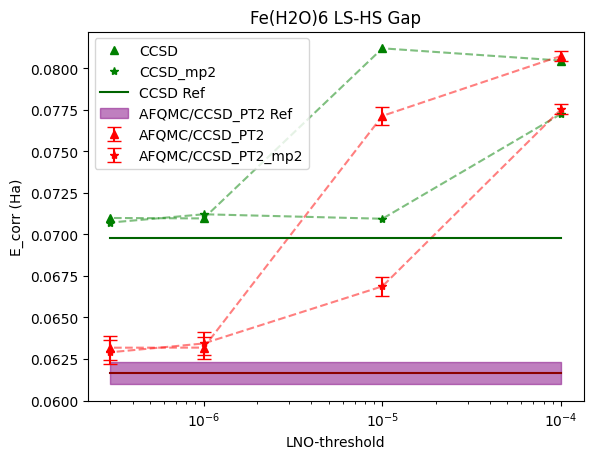

In [6]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(10, 6))
plt.plot(thresh,lno_spin_gap_ccsd,'^',color='green',label='CCSD')
plt.plot(thresh,lno_spin_gap_ccsd,'--',color='green',alpha=0.5)
plt.plot(thresh,lno_spin_gap_ccsd_mp2,'*',color='green',label='CCSD_mp2')
plt.plot(thresh,lno_spin_gap_ccsd_mp2,'--',color='green',alpha=0.5)
# plt.plot(thresh,ccsd_t,'^',color='blue',label='CCSD(T)')
# plt.plot(thresh,ccsd_t,'--',color='blue',alpha=0.5)
# plt.plot(thresh,ccsd_t+mp2cr,'*',color='blue',label='CCSD(T)_mp2')
# plt.plot(thresh,ccsd_t+mp2cr,'--',color='blue',alpha=0.5)
plt.errorbar(thresh,lno_spin_gap_afqmc_pt2,lno_spin_gap_afqmc_pt2_err,fmt='^',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.plot(thresh,lno_spin_gap_afqmc_pt2,'--',color='red',alpha = 0.5)
plt.errorbar(thresh,lno_spin_gap_afqmc_pt2_mp2,lno_spin_gap_afqmc_pt2_err,fmt='*',capsize=5, color='red', label='AFQMC/CCSD_PT2_mp2')
plt.plot(thresh,lno_spin_gap_afqmc_pt2_mp2,'--',color='red',alpha = 0.5)
plt.plot(thresh,ref_spin_gap_ccsd,'-',color='darkgreen',label='CCSD Ref')
# plt.plot(thresh,ref_ccsd_t,'-',color='darkblue',label='CCSD(T) Ref')
plt.plot(thresh,ref_spin_gap_afqmc_pt2,'-', color='darkred')
plt.fill_between(thresh,ref_spin_gap_afqmc_pt2-ref_spin_gap_afqmc_pt2_err,
                 ref_spin_gap_afqmc_pt2+ref_spin_gap_afqmc_pt2_err,
                 color='purple', alpha = 0.5, label='AFQMC/CCSD_PT2 Ref')
plt.xscale('log')
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('Fe(H2O)6 LS-HS Gap')
plt.legend()
plt.show()